In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("data.csv")
print(data.head())
print(data["Odds"].max())

        Name FrontShoes  RearShoes  AmericanStyleCart           CoachName  \
0   Loikkaus  HAS_SHOES  HAS_SHOES              False       Henna Latvala   
1  R.R. Samu  HAS_SHOES  HAS_SHOES              False         Erkki Jämsä   
2   Ekopetus  HAS_SHOES  HAS_SHOES              False        Antti Isomaa   
3     Huuger  HAS_SHOES  HAS_SHOES              False      Satu Siikamäki   
4     Wauhti  HAS_SHOES  HAS_SHOES              False  Veli-Erkki Paavola   

           DriverName  Distance  StartTrack        Sire      StartTime  \
0      Hannu Hietanen      2100           1      Apassi  1514823300000   
1          Mika Forss      2100           2  Suikun Ero  1514823300000   
2       Ville Pohjola      2100           3    A.T. Eko  1514823300000   
3         Niko Jokela      2100           4     Viesker  1514823300000   
4  Veli-Erkki Paavola      2100           5    Valtraus  1514823300000   

   StartType  Day  Month  Year  Winner   Odds  
0  CAR_START    1      1  2018   False   7.8

In [9]:
horses = []
coaches = []
drivers = []
sires = []
for i, row in data.iterrows():
    if row["Name"] not in horses:
        horses.append(row["Name"])
    if row["DriverName"] not in drivers:
        drivers.append(row["DriverName"])
    if row["CoachName"] not in coaches:
        coaches.append(row["CoachName"])
    if (row["Sire"] not in sires):
        sires.append(row["Sire"])

In [124]:
# Used to create dataframes for columns such as DriverName from the main data
def dataframer(dataCol, rows):
    df = pd.DataFrame(0, columns=["count", "wins", "winsPerRace", "meanOdds", "maxOdds", "maxOddsTS", "minOdds", "minOddsTS", "oddsTotal"], index=rows)
    df = df.replace({"minOdds": 0}, 10000)
    for i, row in data.iterrows():
        # Count amount of races
        df["count"][row[dataCol]] += 1
        # Count amount of wins
        if row["Winner"]:
            df["wins"][row[dataCol]] += 1
        #Count total odds for mean
        df["oddsTotal"][row[dataCol]] += row["Odds"]
        # Check if new minimum odd
        if row["Odds"] < df["minOdds"][row[dataCol]] and row["Odds"] != 0:
            df["minOdds"][row[dataCol]] = row["Odds"]
            df["minOddsTS"][row[dataCol]] = row["StartTime"]
        # Check if new maximum odd
        if row["Odds"] > df["maxOdds"][row[dataCol]]:
            df["maxOdds"][row[dataCol]] = row["Odds"]
            df["maxOddsTS"][row[dataCol]] = row["StartTime"]

    df["winsPerRace"] = df["wins"] / df["count"]
    df["meanOdds"] = df["oddsTotal"] / df["count"] 
    return df

In [129]:
def sortAndSlice(df, col, slicer):
    sortd = df.sort_values(by=[col], ascending=False)
    sortedS = sortd[:slicer]
    return sortedS

In [132]:
siresDf = dataframer("Sire", sires)

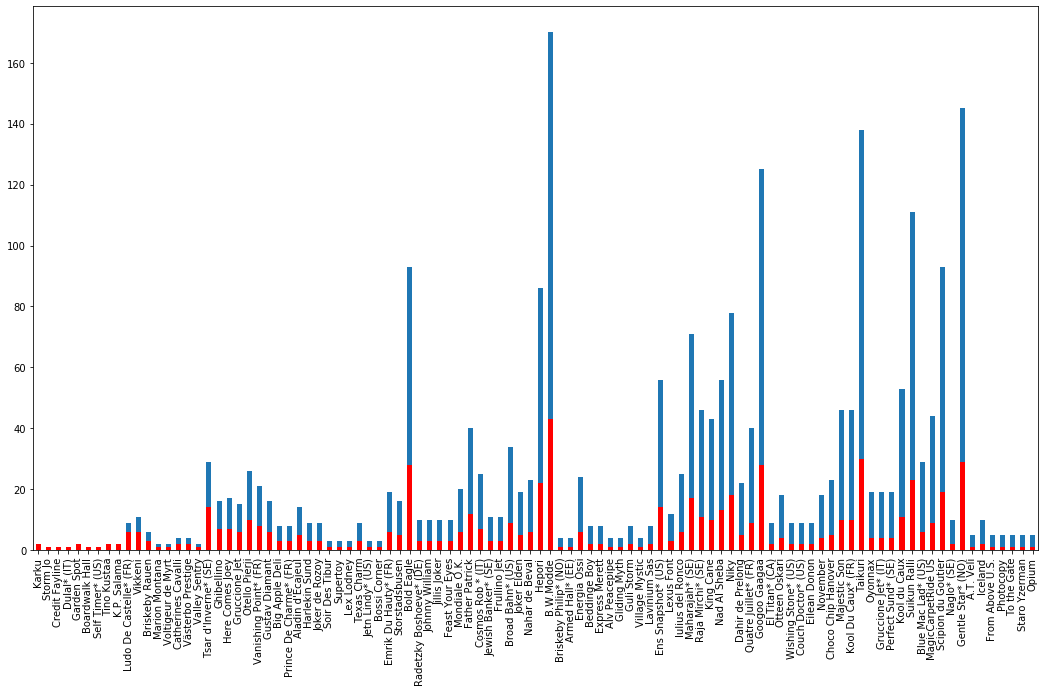

In [133]:
winRatio = sortAndSlice(siresDf, "winsPerRace", 100)
ax = winRatio["count"].plot.bar(figsize=(18,10))
winRatio["wins"].plot.bar(ax=ax, color="red")
# Top 100 best win ratio sires with the count of races and wins visualized

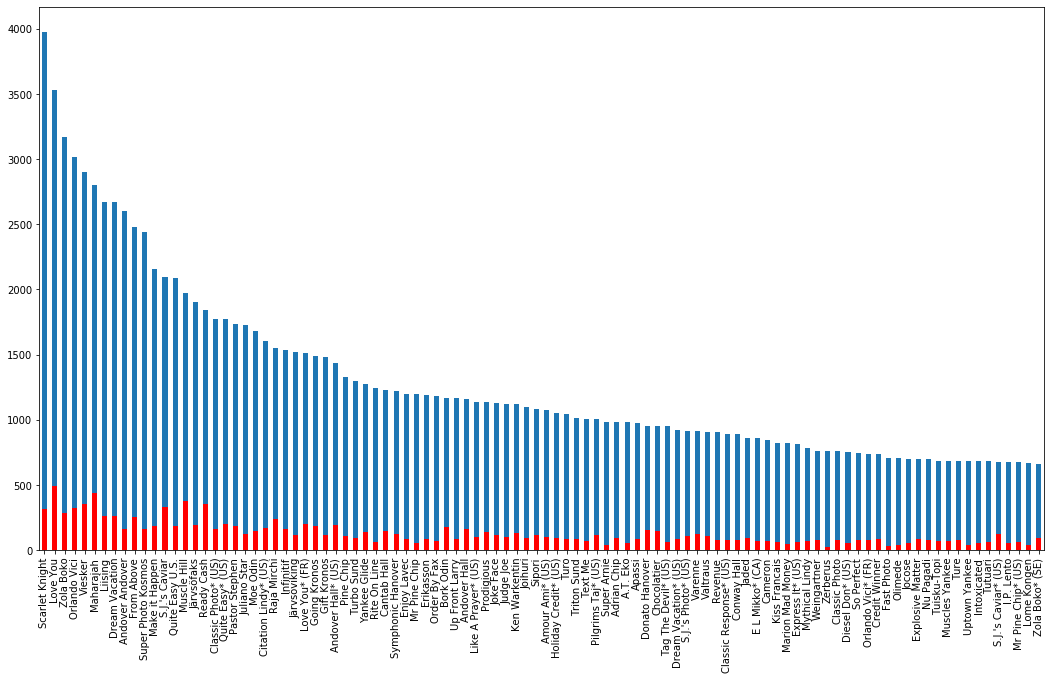

In [136]:
count = sortAndSlice(siresDf, "count", 100)
ax = count["count"].plot.bar(figsize=(18,10))
count["wins"].plot.bar(ax=ax, color="red")

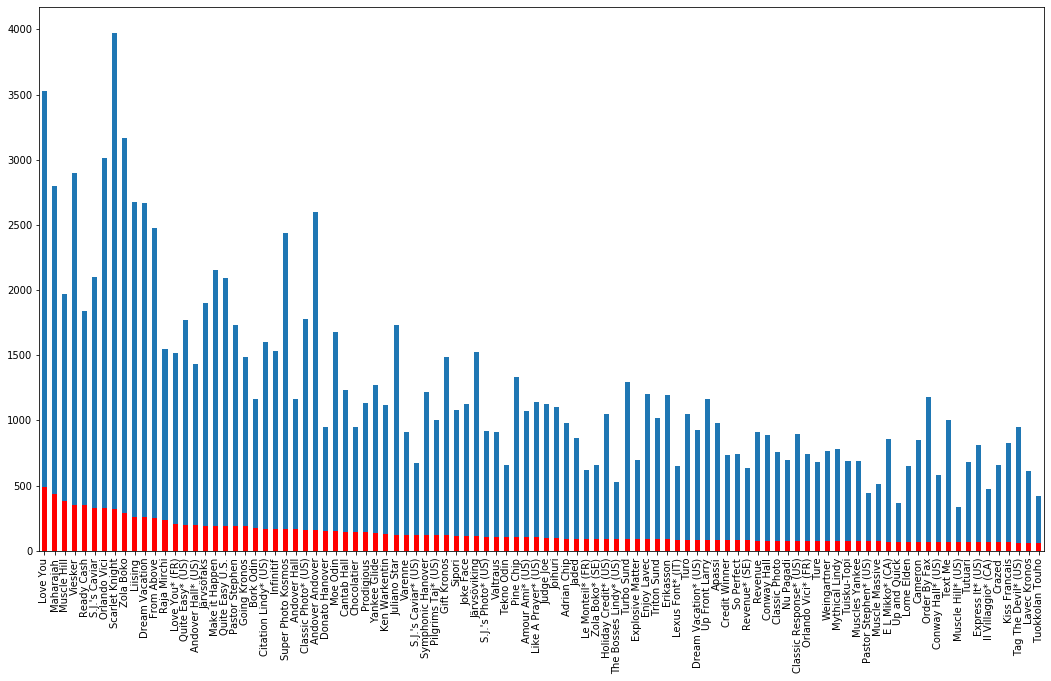

In [137]:
wins = sortAndSlice(siresDf, "wins", 100)
ax = wins["count"].plot.bar(figsize=(18,10))
wins["wins"].plot.bar(ax=ax, color="red")

In [140]:
horseDf = dataframer("Name", horses)

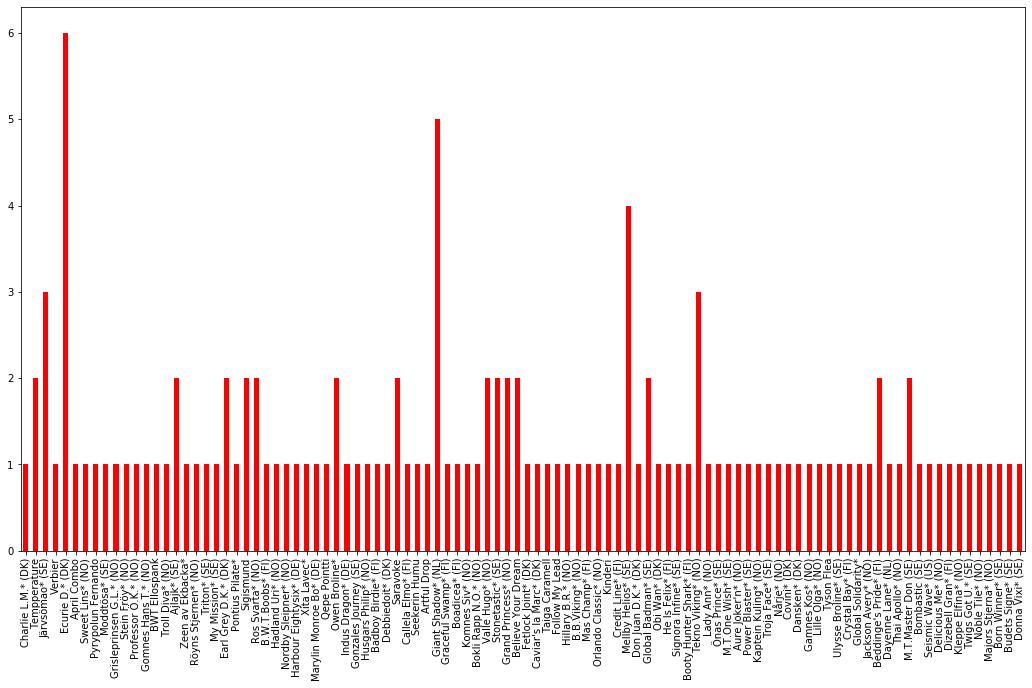

In [142]:
winRatio = sortAndSlice(horseDf, "winsPerRace", 100)
ax = winRatio["count"].plot.bar(figsize=(18,10))
winRatio["wins"].plot.bar(ax=ax, color="red")

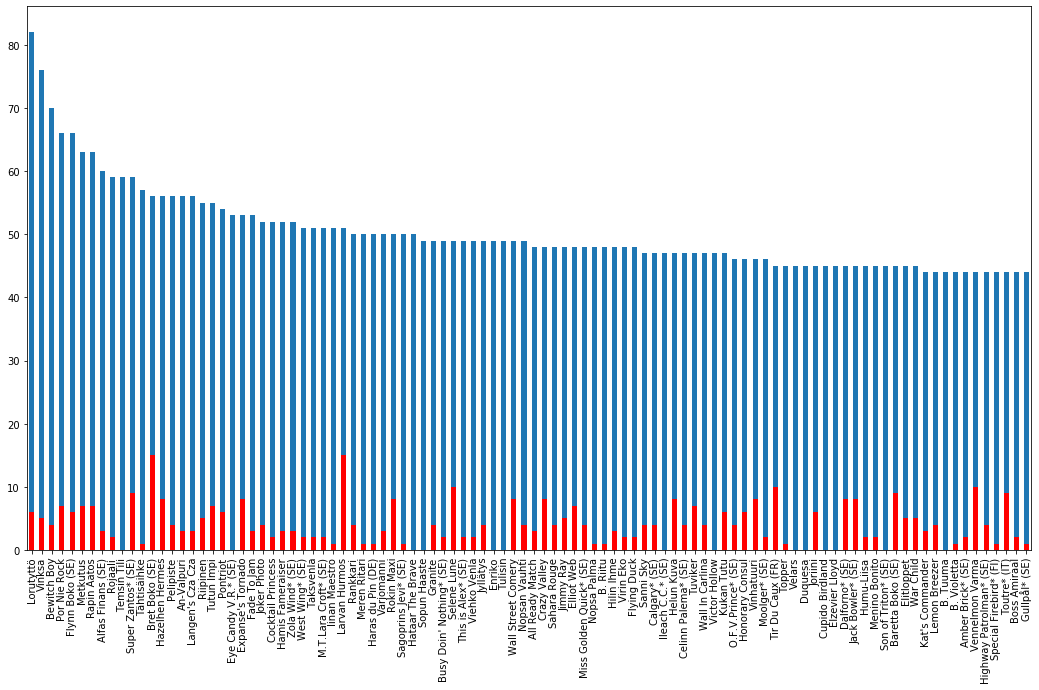

In [143]:
count = sortAndSlice(horseDf, "count", 100)
ax = count["count"].plot.bar(figsize=(18,10))
count["wins"].plot.bar(ax=ax, color="red")

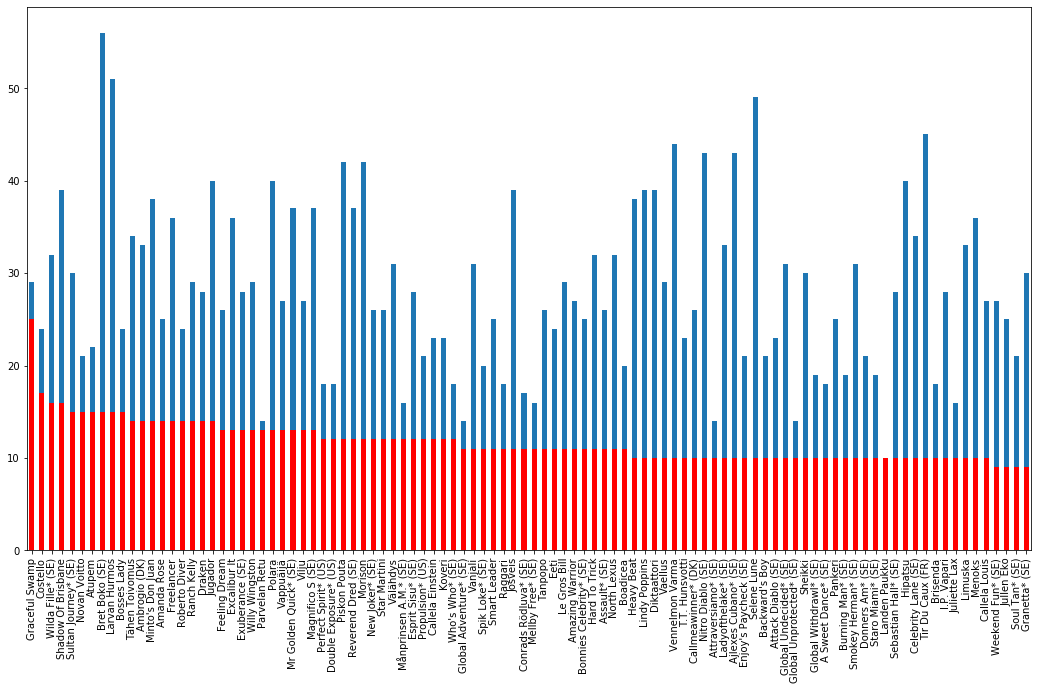

In [144]:
wins = sortAndSlice(horseDf, "wins", 100)
ax = wins["count"].plot.bar(figsize=(18,10))
wins["wins"].plot.bar(ax=ax, color="red")

In [145]:
coachDf = dataframer("CoachName", coaches)

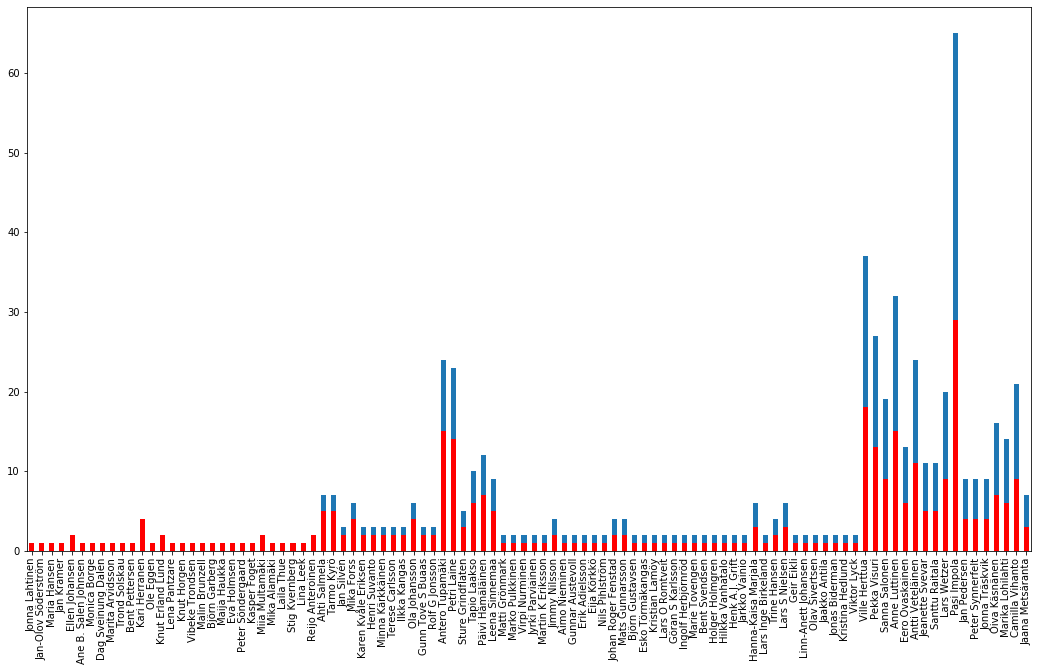

In [146]:
winRatio = sortAndSlice(coachDf, "winsPerRace", 100)
ax = winRatio["count"].plot.bar(figsize=(18,10))
winRatio["wins"].plot.bar(ax=ax, color="red")

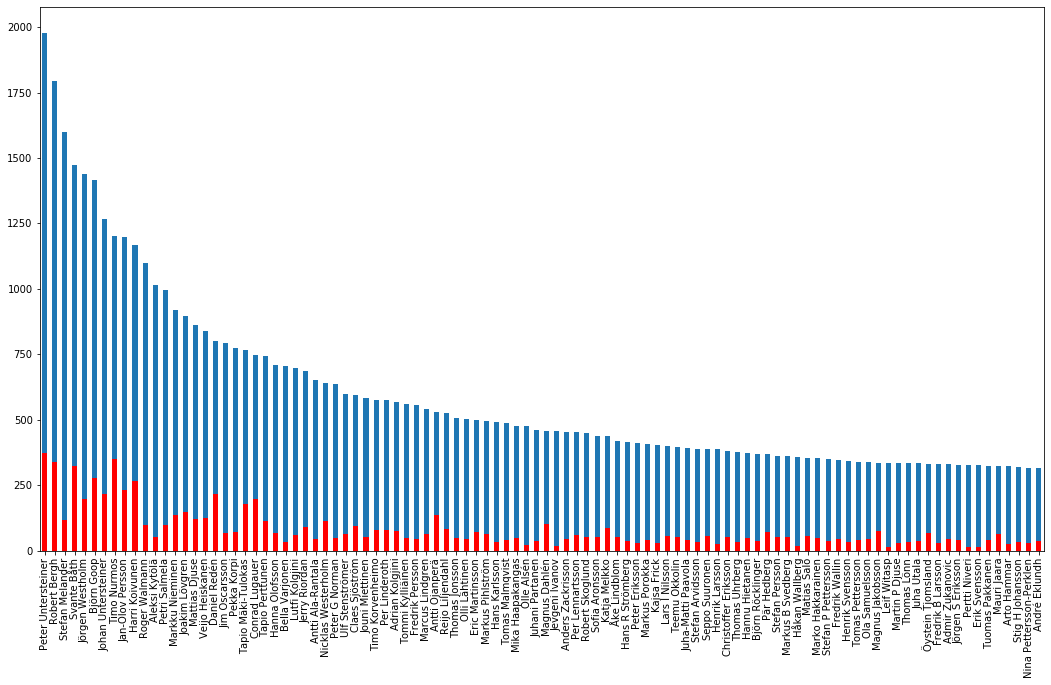

In [147]:
count = sortAndSlice(coachDf, "count", 100)
ax = count["count"].plot.bar(figsize=(18,10))
count["wins"].plot.bar(ax=ax, color="red")

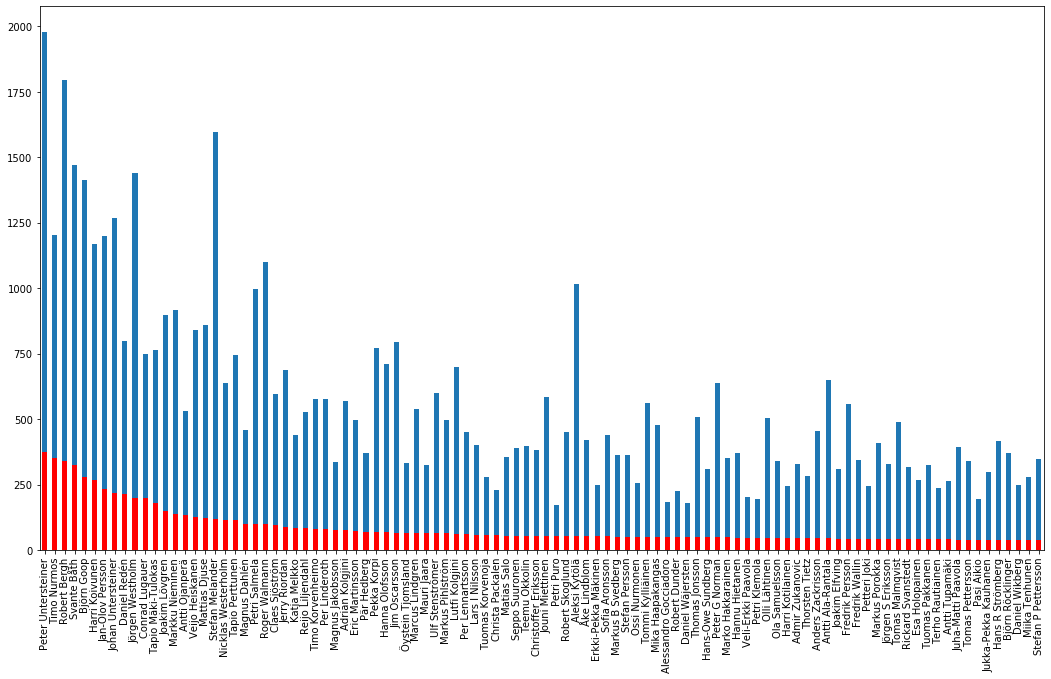

In [148]:
wins = sortAndSlice(coachDf, "wins", 100)
ax = wins["count"].plot.bar(figsize=(18,10))
wins["wins"].plot.bar(ax=ax, color="red")

In [149]:
driverDf = dataframer("DriverName", drivers)

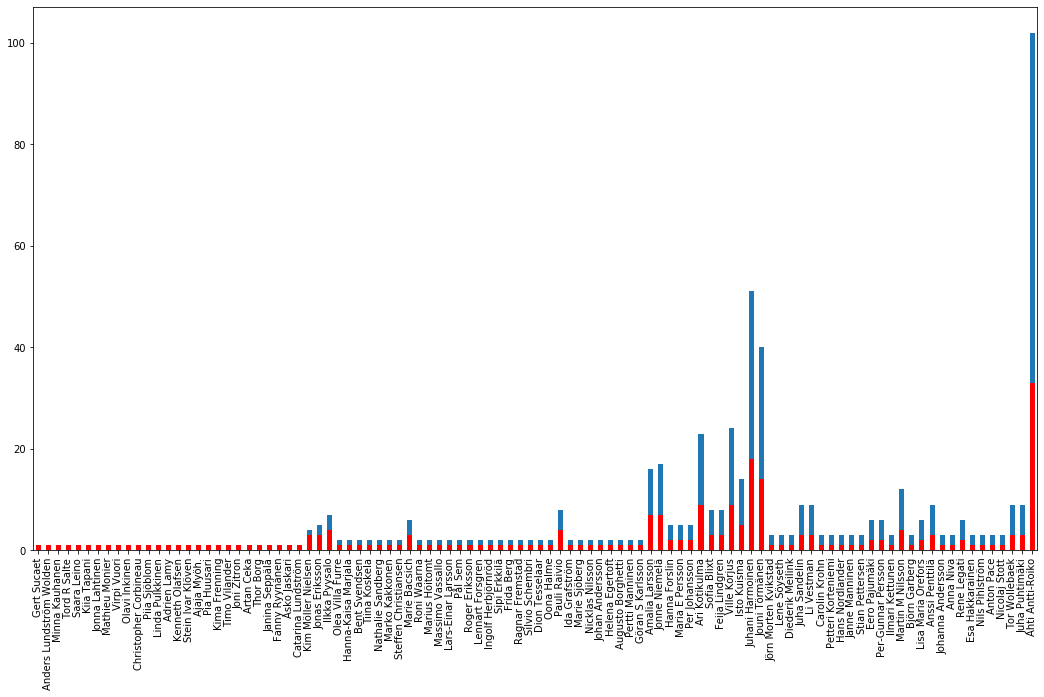

In [150]:
winRatio = sortAndSlice(driverDf, "winsPerRace", 100)
ax = winRatio["count"].plot.bar(figsize=(18,10))
winRatio["wins"].plot.bar(ax=ax, color="red")

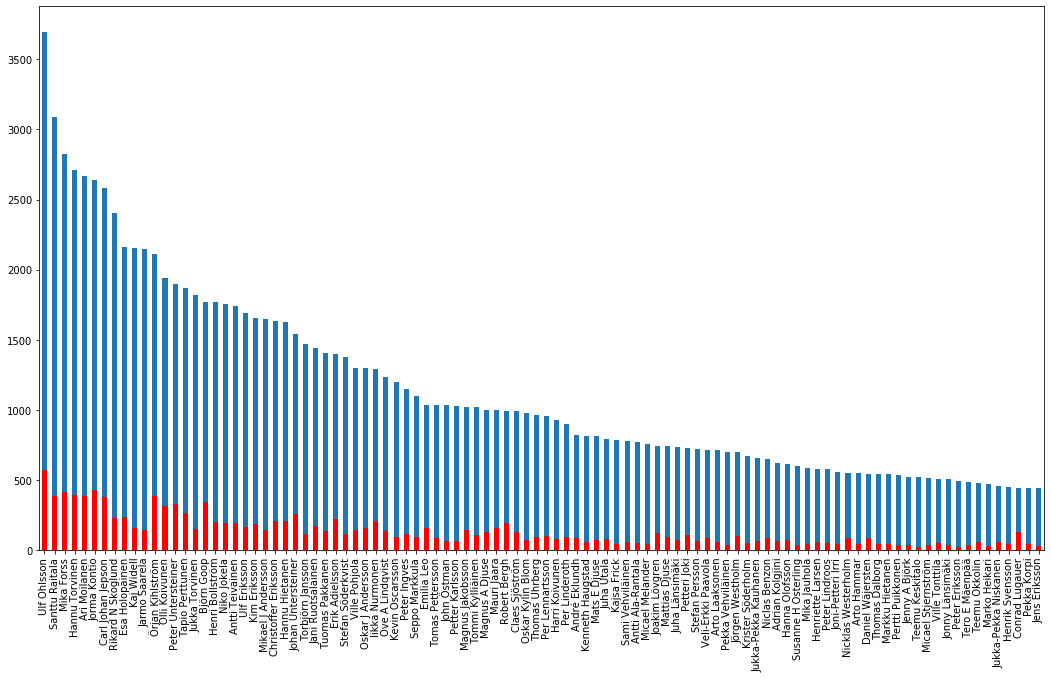

In [151]:
count = sortAndSlice(driverDf, "count", 100)
ax = count["count"].plot.bar(figsize=(18,10))
count["wins"].plot.bar(ax=ax, color="red")

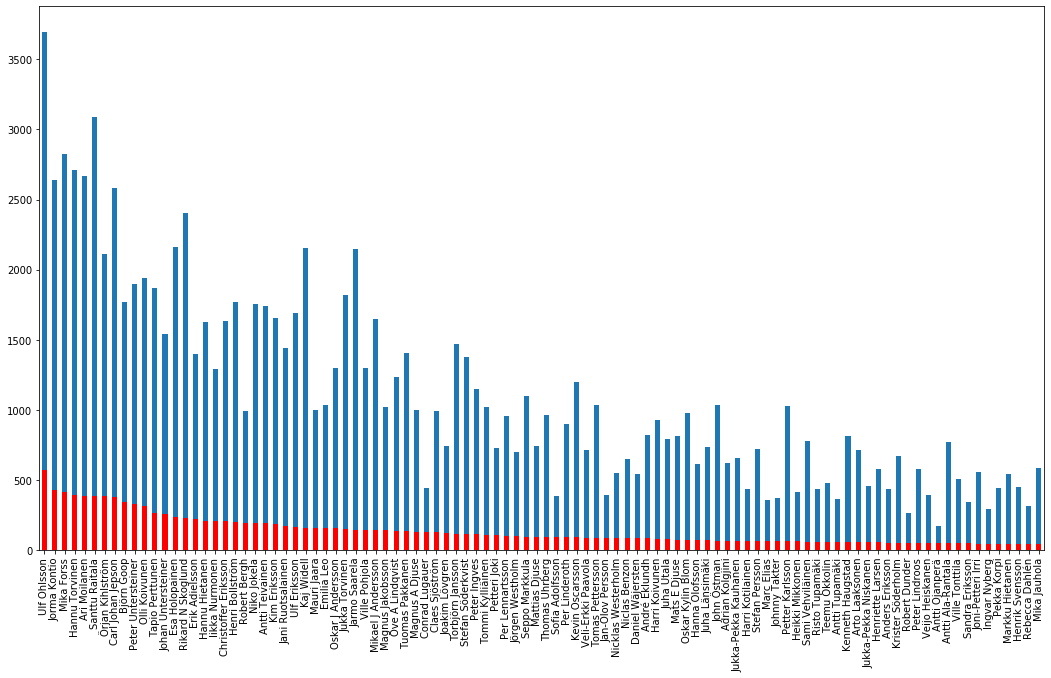

In [152]:
wins = sortAndSlice(driverDf, "wins", 100)
ax = wins["count"].plot.bar(figsize=(18,10))
wins["wins"].plot.bar(ax=ax, color="red")